In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [154]:
# import data
df = pd.read_csv('Data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [155]:
df.duplicated().sum()

1

In [156]:
df.drop_duplicates(inplace=True)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


age


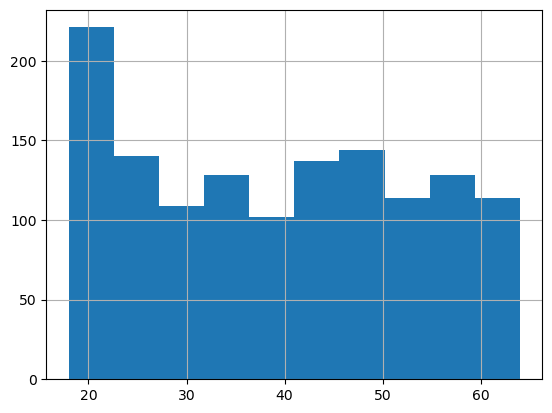

sex


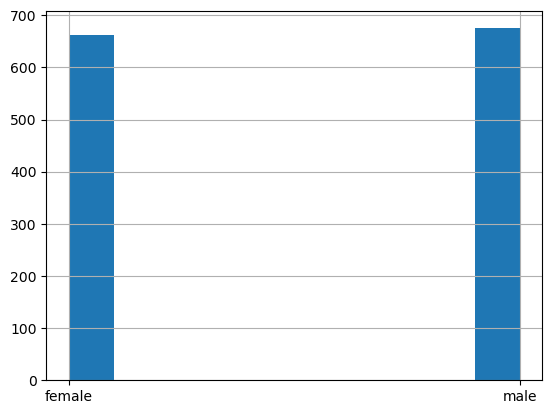

bmi


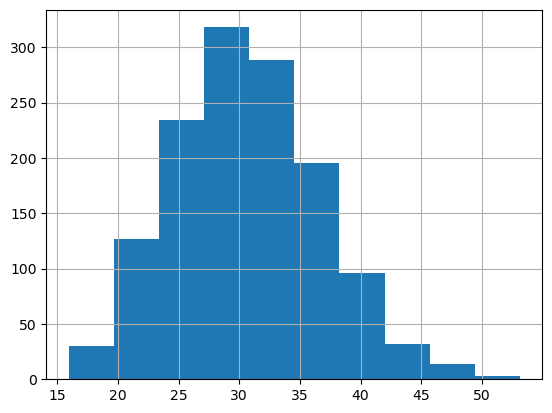

children


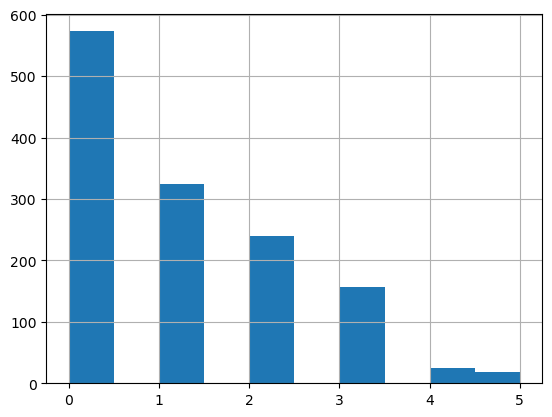

smoker


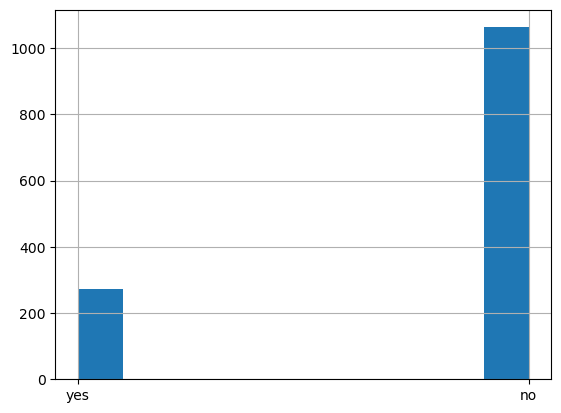

region


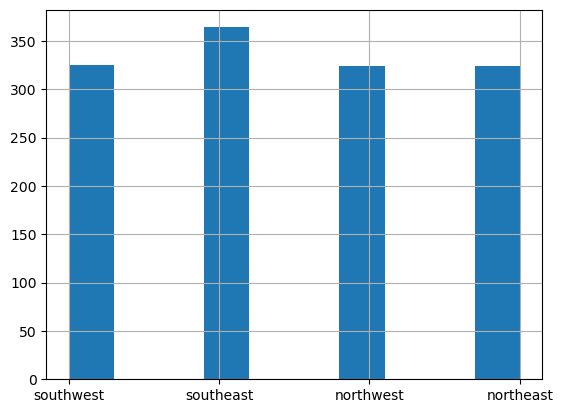

charges


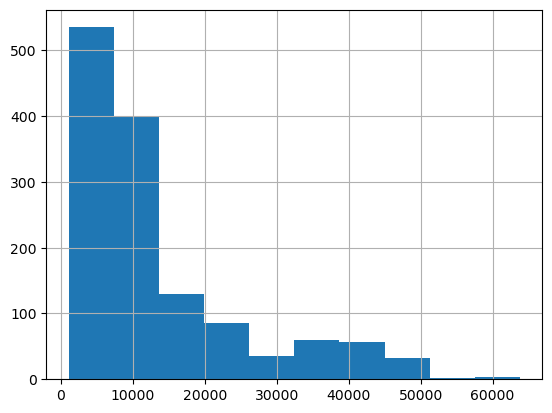

In [158]:
for col in df.columns:
    print(col)
    df[col].hist()
    plt.show()

## Do smokers have higher insurance charges than non-smokers?

We will use a 2-sample T-Test to compare the charges for each of these 2 groups.

**Null Hypothesis**: There is no difference in charges between smokers and nonsmokers

**Alternate Hypothesis**: Smokers and nonsmokers incur different amounts of charges.

In [159]:
smokers = df[df['smoker'] == 'yes']
nonsmokers = df[df['smoker'] == 'no']
smokers.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


### Test for normality

In [160]:
# test smokers for normality
stats.normaltest(smokers['charges'])

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

We reject the null hypothesis that the data is normally distributed

In [161]:
stats.normaltest(nonsmokers['charges'])

NormaltestResult(statistic=316.23579659917766, pvalue=2.1392881146814186e-69)

We reject the null hypothesis that the data is normal.

In [162]:
print(f'n of smokers = {len(smokers)}')
print(f'n of nonsmokers = {len(nonsmokers)}')

n of smokers = 274
n of nonsmokers = 1063


Both samples are greater than 15, so we can proceed

### Test for outliers

In [163]:
zscores = stats.zscore(smokers['charges'])
outliers = abs(zscores) > 3
print(f'There are {np.sum(outliers)} in the smokers sample')

There are 0 in the smokers sample


There are no outliers in the 

In [164]:
zscores = stats.zscore(nonsmokers['charges'])
outliers = abs(zscores) >= 3
print(f'There are {np.sum(outliers)} in the nonsmokers sample')

There are 24 in the nonsmokers sample


In [165]:
nonsmokers = nonsmokers[~outliers]

We removed the outliers

### Test for Equal Variance

In [166]:
stats.levene(smokers['charges'], nonsmokers['charges'])

LeveneResult(statistic=520.7178262969225, pvalue=2.512613039096279e-97)

The two groups do NOT have equal variance.  We will note this for determining our test.

## T-Test

In [167]:
stats.ttest_ind(smokers['charges'], nonsmokers['charges'], equal_var=False)

Ttest_indResult(statistic=33.723466247187815, pvalue=2.7282718648018296e-104)

We reject the null hypothesis that there is no difference between the groups.  Further, since the test statistic is positive, we can say that the smokers have higher charges than the nonsmokers.

<AxesSubplot: xlabel='smoker', ylabel='charges'>

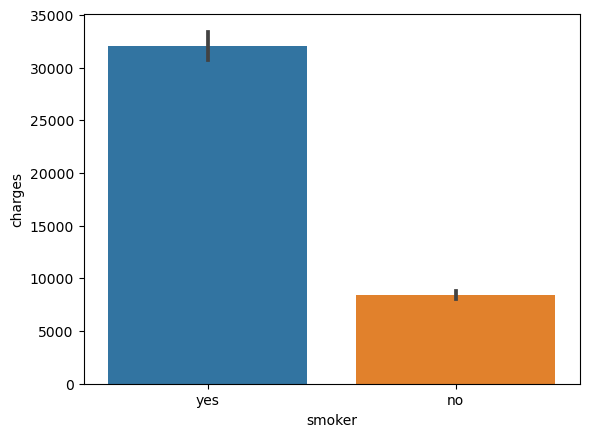

In [168]:
sns.barplot(data=df, x='smoker', y='charges')

It seems we can refine our finding to state that smokers do incur higher charges.

## Are men more likely to smoke than women?

**Null Hypothesis**: There is no difference in rates of smoking between men and women

**Alternate Hypothesis**: Men and women smoke at different rates.

For this, since gender and smoker features are categorical, we will use a chi-square test.

### Assumption 1: There are 2 categorical features.

In [169]:
gender_smoking = df[['sex','smoker']]
gender_smoking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     1337 non-null   object
 1   smoker  1337 non-null   object
dtypes: object(2)
memory usage: 31.3+ KB


There are 2 features and both are categorical.

### Assumption 2 the outcomes are independent.

This is a harder one to test, but there is no obvious direct dependency between these columns.

In [170]:
sex_smoking_contingency = pd.crosstab(gender_smoking['sex'], gender_smoking['smoker'])
sex_smoking_contingency

smoker,no,yes
sex,,
female,547,115
male,516,159


In [171]:
t, p, _, _ = stats.chi2_contingency(sex_smoking_contingency)
print(p)
print(t)

0.0062765550120107375
7.469139330086637


We reject the null hypothesis and accept that alternate hypothesis that there is a difference in rates of smoking between men and women.

In [172]:
gender_smoking['smoker'].replace(['yes','no'], [1, 0], inplace=True)
gender_smoking

C:\Users\caell\AppData\Local\Temp\ipykernel_9780\834508737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_smoking['smoker'].replace(['yes','no'], [1, 0], inplace=True)


,sex,smoker
0,female,1
1,male,0
2,male,0
3,male,0
4,male,0
...,...,...
1333,male,0
1334,female,0
1335,female,0
1336,female,0


<AxesSubplot: xlabel='sex', ylabel='smoker'>

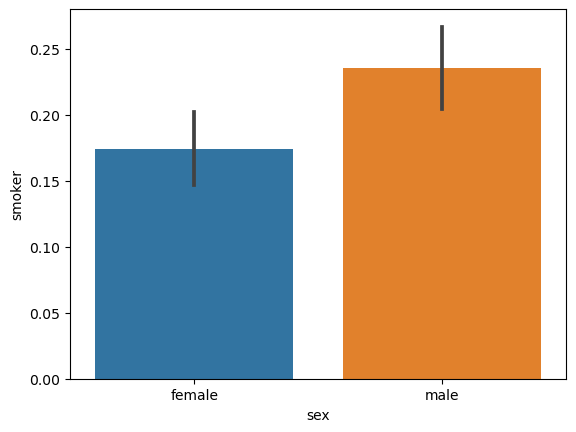

In [173]:
sns.barplot(data=gender_smoking, x='sex', y='smoker')

# Do different regions have different charges, on average?

For this we will use an ANOVA test to determine the significance of differences between regions.  Then we will use a Tuky pairwise test to determine which regions are most different.

**Null Hypothesis** There is no difference in the average charges between regions.

**Alternate Hypothesis** There is a difference in charges in different regions.

### Assumption 1: Normality

In [174]:
df_regions = df.copy()

In [175]:
for region in df_regions['region'].unique():
    print(region)
    region_charges = df_regions[df_regions['region'] == region]['charges']
    normal_test = stats.normaltest(region_charges)
    print(normal_test)

southwest
NormaltestResult(statistic=102.29405938390713, pvalue=6.125298236442602e-23)
southeast
NormaltestResult(statistic=65.87744615949309, pvalue=4.953296503171451e-15)
northwest
NormaltestResult(statistic=106.7796699268889, pvalue=6.5026336282160374e-24)
northeast
NormaltestResult(statistic=86.7476288427183, pvalue=1.455431391274411e-19)


It seems that none of the regions have a normal distribution of charges.

In [176]:
for region in df_regions['region'].unique():
    region_charges = df_regions[df_regions['region'] == region]['charges']
    print(f'{region} has {len(region_charges)} samples')

southwest has 325 samples
southeast has 364 samples
northwest has 324 samples
northeast has 324 samples


Each sample has an n > 15, so we will proceed.

### Assumption 2: No Outliers

In [177]:
for region in df_regions['region'].unique():
    print(region)
    region_charges = df_regions[df_regions['region'] == region]['charges']
    zscores = stats.zscore(region_charges)
    outliers = abs(zscores >= 3)
    print(np.sum(outliers))

southwest
8
southeast
2
northwest
7
northeast
4


It seems we have some outliers in each region.  We will remove those.

In [178]:
df_regions['outlier'] = False
for region in df_regions['region'].unique():
    region_charges = df_regions[df_regions['region'] == region]['charges']
    zscores = stats.zscore(region_charges)
    outliers = abs(zscores >= 3)
    df_regions.loc[(df['region'] == region) & outliers, 'outlier'] = True

df_regions = df_regions[~df_regions['outlier']]

print(f'We dropped {len(df) - len(df_regions)} outliers')

We dropped 21 outliers


### Assumption 3: Equal Variance

In [183]:
region_charges = []
for region in df_regions['region'].unique():
    region_charge = df_regions.loc[df_regions['region'] == region, 'charges']
    region_charges.append(region_charge.values)
region_charges

[array([16884.924  ,  1826.843  ,  1837.237  , 10602.385  , 36837.467  ,
         4149.736  , 38711.     , 35585.576  ,  4687.797  ,  2302.3    ,
        20630.28351, 23568.272  ,  1743.214  , 14235.072  , 11741.726  ,
         7726.854  , 39836.519  , 11073.176  , 12105.32   , 15820.699  ,
         6186.127  ,  5003.853  ,  2331.519  , 11881.358  ,  4646.759  ,
         7740.337  , 17081.08   ,  9634.538  ,  6082.405  , 11163.568  ,
         1261.442  ,  2166.732  ,  1842.519  , 10450.552  ,  5152.134  ,
         4830.63   ,  8116.68   ,  5246.047  , 10436.096  ,  8823.279  ,
         5325.651  ,  6775.961  ,  4883.866  ,  5649.715  ,  7147.105  ,
        13880.949  ,  1980.07   ,  8520.026  ,  7371.772  ,  5012.471  ,
         5253.524  , 34779.615  ,  1727.785  , 12333.828  , 35160.13457,
         7196.867  ,  1832.094  ,  4260.744  , 11837.16   ,  7441.053  ,
        42856.838  ,  2150.469  ,  9625.92   ,  3172.018  ,  3906.127  ,
        16297.846  , 12646.207  , 20177.67113,  844

In [185]:
stats.levene(*region_charges)

LeveneResult(statistic=9.515214992781331, pvalue=3.218183807441283e-06)

We reject the null hypothesis that the regions do have equal variance.

Instead of ANOVA, we will choose the Kruskal-Wallis test instead.

In [186]:
stats.kruskal(*region_charges)

KruskalResult(statistic=6.770873301853044, pvalue=0.07957070570915381)

We cannot reject the null hypothesis that the regions have the same mean charges.

<AxesSubplot: xlabel='region', ylabel='charges'>

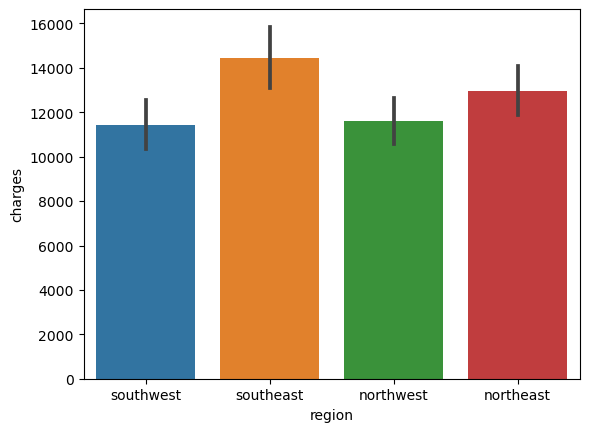

In [189]:
sns.barplot(data=df_regions, x='region', y='charges')